In [2]:
import matplotlib.pyplot as plt
import numpy as np
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas as pd
from datetime import datetime

In [3]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [4]:
#read data
df = pd.read_csv(r'C:\Users\I539797\Documents\Thesis\Datasets\Formatted Datasets\formatted_saopaulo.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
df.head()

,NumericIndex,OriginMovementID,DestinationMovementID,MeanTravelTimeSeconds,RangeLowerBoundTravelTimeSeconds,RangeUpperBoundTravelTimeSeconds,DayOfWeek
Date,,,,,,,
2016-01-02,502791,5,318,964,814,1141,Saturday
2016-01-02,502761,5,77,563,398,794,Saturday
2016-01-02,502760,5,64,741,583,940,Saturday
2016-01-02,502759,5,63,661,468,932,Saturday
2016-01-02,502758,5,62,595,393,899,Saturday


In [15]:
df = pd.DataFrame(df.groupby('Date')['MeanTravelTimeSeconds'].mean()[:-90])
df.head()

,MeanTravelTimeSeconds
Date,
2016-01-02,744.509434
2016-01-03,899.809524
2016-01-04,905.813559
2016-01-05,909.786885
2016-01-06,929.409449


Text(0.5, 1.0, 'Time Series Data')

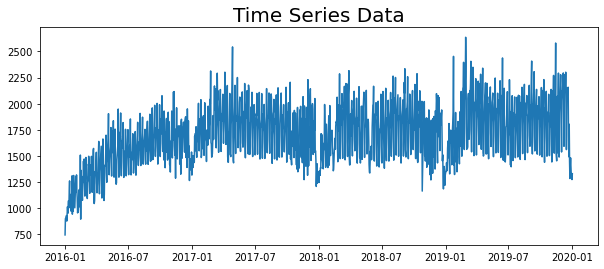

In [17]:
plt.figure(figsize=(10,4))
plt.plot(df)
plt.title('Time Series Data', fontsize=20)

In [18]:
df['pct_change'] = df['MeanTravelTimeSeconds'].pct_change().dropna()

Text(0.5, 1.0, 'Data Volatility')

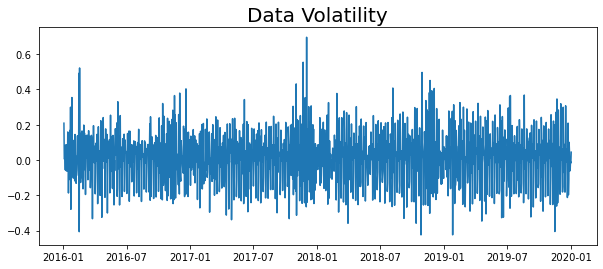

In [19]:
plt.figure(figsize=(10,4))
plt.plot(df['pct_change'])
plt.title('Data Volatility', fontsize=20)

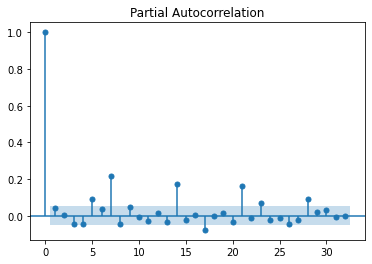

In [20]:
plot_pacf(np.array(df['MeanTravelTimeSeconds'].diff().dropna())**2)
plt.show()

In [21]:
test_size = len(df['MeanTravelTimeSeconds']*0.1)
train, test = df['MeanTravelTimeSeconds'][:-test_size], df['MeanTravelTimeSeconds'][-test_size:]

In [22]:
model = arch_model(train, p=1, q=1)

In [23]:
model_fit = model.fit()

ValueError: first_obs and last_obs produce in an empty array.